## Welcome to the Capstone Project - The Battle of Neighborhoods

### Created by Stanislav Kremenchutskyi <br> All rights reserved

#### Let's begin...

##### Import all essential libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries successfully imported!')

Libraries successfully imported!


##### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'IL3PP5XI2OX5JFQCLT25TCEYAVI1R5HSBZJHUO3WEW5CZND0' 
CLIENT_SECRET = 'VUI1YWUV4KPE15E1XKVRBLGOGXK3GPM3EPYYVEFOYRO12VHQ' 
ACCESS_TOKEN = 'T2LPEPMJC5GDIOKOKZ00KN50LULI0DCIDLC3LMAPZQDKHJT0' 
VERSION = '20180604'
LIMIT = 30
LIMIT4 = 40
LIMIT5 = 50

##### Get the geographical coordinates of Ottawa

In [3]:
address = "Ottawa"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

45.421106 -75.690308


##### Using Foursquare let's find Schools around the Ottawa center

In [4]:
search = 'School'
radius = 3000
print(search + 's found!')

Schools found!


##### Create the GET request schoolURL

In [5]:
schoolURL = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search, radius, LIMIT)
schoolURL

'https://api.foursquare.com/v2/venues/search?client_id=IL3PP5XI2OX5JFQCLT25TCEYAVI1R5HSBZJHUO3WEW5CZND0&client_secret=VUI1YWUV4KPE15E1XKVRBLGOGXK3GPM3EPYYVEFOYRO12VHQ&ll=45.421106,-75.690308&oauth_token=T2LPEPMJC5GDIOKOKZ00KN50LULI0DCIDLC3LMAPZQDKHJT0&v=20180604&query=School&radius=3000&limit=30'

##### Send the GET request and examine the results

In [6]:
schoolsFound = requests.get(schoolURL).json()
schoolsFound

{'meta': {'code': 200, 'requestId': '603aaea8720e8226929ffacb'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b156f17f964a520cdac23e3',
    'name': 'Telfer School of Management, Desmarais Building | École De Gestion Telfer, Pavillon Desmarais - uOttawa',
    'location': {'address': '55 Laurier Ave. E',
     'crossStreet': 'Nicholas',
     'lat': 45.423960151390744,
     'lng': -75.68719625473022,
     'labeledLatLngs': [{'label': 'display',
       'lat': 45.423960151390744,
       'lng': -75.68719625473022}],
     'distance': 400,
     'postalCode': 'K1N 1A2',
     'cc': 'CA',
     'city': 'Ottawa',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['55 Laurier Ave. E (Nicholas)',
      'Ottawa ON K1N 1A2',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d198941735',
      'name': 'College Academic Building',
      'pluralName': 'College Academic Buildings',
      'shortName': 'Academic B

In [7]:
# assign relevant part of JSON to found schools
sch = schoolsFound["response"]['venues']

# tranform schools into a dataframe
df = json_normalize(sch)
df.head(10)

/Users/stanislav/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4b156f17f964a520cdac23e3,"Telfer School of Management, Desmarais Buildin...","[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1614458536,False,55 Laurier Ave. E,Nicholas,45.423960,-75.687196,"[{'label': 'display', 'lat': 45.42396015139074...",400,K1N 1A2,CA,Ottawa,ON,Canada,"[55 Laurier Ave. E (Nicholas), Ottawa ON K1N 1..."
1,4b61cfa5f964a52073242ae3,SITE | EITI | School of Information Technology...,"[{'id': '4bf58dd8d48988d19e941735', 'name': 'C...",v-1614458536,False,800 King Edward Ave.,University of Ottawa,45.419349,-75.678435,"[{'label': 'display', 'lat': 45.41934863333903...",948,K1N 6N5,CA,Ottawa,ON,Canada,"[800 King Edward Ave. (University of Ottawa), ..."
2,4d6e4ba6134ea143c4cf8d1a,St Nicholas Adult High School - Central Campus,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1614458536,False,893 Admiral Ave.,Crerar Ave.,45.411785,-75.681177,"[{'label': 'display', 'lat': 45.41178523352911...",1259,K1Z 6L6,CA,Ottawa,ON,Canada,"[893 Admiral Ave. (Crerar Ave.), Ottawa ON K1Z..."
3,4b7f5405f964a520d62730e3,Glashan Public School,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1614458536,False,28 Arlington Ave,@ Kent,45.409477,-75.692936,"[{'label': 'display', 'lat': 45.40947740879049...",1310,K2P 1C2,CA,Ottawa,ON,Canada,"[28 Arlington Ave (@ Kent), Ottawa ON K2P 1C2,..."
4,4da5b0f54df024212d4d3e61,St. Nicholas Adult High School - West Campus,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",v-1614458536,False,20 Graham Ave.,Main St.,45.411466,-75.681028,"[{'label': 'display', 'lat': 45.41146579274882...",1295,K1S 0B7,CA,Ottawa,ON,Canada,"[20 Graham Ave. (Main St.), Ottawa ON K1S 0B7,..."
5,4b6d9f11f964a520fd802ce3,The School of Dance,"[{'id': '4bf58dd8d48988d199941735', 'name': 'C...",v-1614458536,False,200 Crichton St,NaN,45.439953,-75.683842,"[{'label': 'display', 'lat': 45.43995255783223...",2157,K1M 1W2,CA,Ottawa,ON,Canada,"[200 Crichton St, Ottawa ON K1M 1W2, Canada]"
6,4d8e51c2c3d04eb9d2e9d1c9,Immaculata Catholic High School track,"[{'id': '4bf58dd8d48988d106941735', 'name': 'T...",v-1614458536,False,140 Main St.,at Oblate Ave.,45.409515,-75.680489,"[{'label': 'display', 'lat': 45.40951503726683...",1501,K2S 5P4,CA,Ottawa,ON,Canada,"[140 Main St. (at Oblate Ave.), Ottawa ON K2S ..."
7,57ed4cee498e8e4cd3038ab5,School of Sociological and Anthropological Stu...,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1614458536,False,NaN,NaN,45.421535,-75.683906,"[{'label': 'display', 'lat': 45.421535, 'lng':...",502,K1N 6N5,CA,Ottawa,ON,Canada,"[Ottawa ON K1N 6N5, Canada]"
8,4bd6f0735631c9b64e9ba630,Canadian School of Public Service,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",v-1614458536,False,111 Sussex Drive,NaN,45.439676,-75.695047,"[{'label': 'display', 'lat': 45.439676, 'lng':...",2100,K1N 6Z2,CA,Ottawa,ON,Canada,"[111 Sussex Drive, Ottawa ON K1N 6Z2, Canada]"
9,4b5b1129f964a520d7e128e3,Ottawa School of Dance,[],v-1614458536,False,NaN,NaN,45.424112,-75.689720,"[{'label': 'display', 'lat': 45.4241122970203,...",337,NaN,CA,Ottawa,ON,Canada,"[Ottawa ON, Canada]"


##### Clean the data

In [8]:
# keep only columns that include school name and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
cleared_data = df.loc[:, filtered_columns]

# function that extracts the category of the school
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
cleared_data['categories'] = cleared_data.apply(get_category_type, axis=1)

# clean column names by keeping only last term
cleared_data.columns = [column.split('.')[-1] for column in cleared_data.columns]

cleared_data

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,"Telfer School of Management, Desmarais Buildin...",College Academic Building,55 Laurier Ave. E,Nicholas,45.423960,-75.687196,"[{'label': 'display', 'lat': 45.42396015139074...",400,K1N 1A2,CA,Ottawa,ON,Canada,"[55 Laurier Ave. E (Nicholas), Ottawa ON K1N 1...",4b156f17f964a520cdac23e3
1,SITE | EITI | School of Information Technology...,College Engineering Building,800 King Edward Ave.,University of Ottawa,45.419349,-75.678435,"[{'label': 'display', 'lat': 45.41934863333903...",948,K1N 6N5,CA,Ottawa,ON,Canada,"[800 King Edward Ave. (University of Ottawa), ...",4b61cfa5f964a52073242ae3
2,St Nicholas Adult High School - Central Campus,College Academic Building,893 Admiral Ave.,Crerar Ave.,45.411785,-75.681177,"[{'label': 'display', 'lat': 45.41178523352911...",1259,K1Z 6L6,CA,Ottawa,ON,Canada,"[893 Admiral Ave. (Crerar Ave.), Ottawa ON K1Z...",4d6e4ba6134ea143c4cf8d1a
3,Glashan Public School,College Academic Building,28 Arlington Ave,@ Kent,45.409477,-75.692936,"[{'label': 'display', 'lat': 45.40947740879049...",1310,K2P 1C2,CA,Ottawa,ON,Canada,"[28 Arlington Ave (@ Kent), Ottawa ON K2P 1C2,...",4b7f5405f964a520d62730e3
4,St. Nicholas Adult High School - West Campus,Student Center,20 Graham Ave.,Main St.,45.411466,-75.681028,"[{'label': 'display', 'lat': 45.41146579274882...",1295,K1S 0B7,CA,Ottawa,ON,Canada,"[20 Graham Ave. (Main St.), Ottawa ON K1S 0B7,...",4da5b0f54df024212d4d3e61
5,The School of Dance,College Arts Building,200 Crichton St,NaN,45.439953,-75.683842,"[{'label': 'display', 'lat': 45.43995255783223...",2157,K1M 1W2,CA,Ottawa,ON,Canada,"[200 Crichton St, Ottawa ON K1M 1W2, Canada]",4b6d9f11f964a520fd802ce3
6,Immaculata Catholic High School track,Track,140 Main St.,at Oblate Ave.,45.409515,-75.680489,"[{'label': 'display', 'lat': 45.40951503726683...",1501,K2S 5P4,CA,Ottawa,ON,Canada,"[140 Main St. (at Oblate Ave.), Ottawa ON K2S ...",4d8e51c2c3d04eb9d2e9d1c9
7,School of Sociological and Anthropological Stu...,General College & University,NaN,NaN,45.421535,-75.683906,"[{'label': 'display', 'lat': 45.421535, 'lng':...",502,K1N 6N5,CA,Ottawa,ON,Canada,"[Ottawa ON K1N 6N5, Canada]",57ed4cee498e8e4cd3038ab5
8,Canadian School of Public Service,Government Building,111 Sussex Drive,NaN,45.439676,-75.695047,"[{'label': 'display', 'lat': 45.439676, 'lng':...",2100,K1N 6Z2,CA,Ottawa,ON,Canada,"[111 Sussex Drive, Ottawa ON K1N 6Z2, Canada]",4bd6f0735631c9b64e9ba630
9,Ottawa School of Dance,None,NaN,NaN,45.424112,-75.689720,"[{'label': 'display', 'lat': 45.4241122970203,...",337,NaN,CA,Ottawa,ON,Canada,"[Ottawa ON, Canada]",4b5b1129f964a520d7e128e3


##### Take a look at school names

In [10]:
cleared_data.name

0     Telfer School of Management, Desmarais Buildin...
1     SITE | EITI | School of Information Technology...
2        St Nicholas Adult High School - Central Campus
3                                 Glashan Public School
4          St. Nicholas Adult High School - West Campus
5                                   The School of Dance
6                 Immaculata Catholic High School track
7     School of Sociological and Anthropological Stu...
8                     Canadian School of Public Service
9                                Ottawa School of Dance
10                                     4405 School Draw
11                           St. Brigid Catholic School
12                          École Caron Language School
13                           Elgin Street Public School
14                        Hopewell Avenue Public School
15           Telfer School of Management, EMBA Facility
16                            Official Languages School
17                         Interlangues Language

###### Display schools on map

In [11]:
schools_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map 


for lat, lng, label in zip(cleared_data.lat, cleared_data.lng, cleared_data.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(schools_map)

# display map
schools_map



### Let's continue our exploration by looking at statistics of house price dynamics in Ottawa with data taken from https://www.agentinottawa.com

##### Convert csv file to dataframe

In [12]:
csv = pd.read_csv("/Users/stanislav/HousePrice.csv")

csv

,Year,# Sales,Average Price,% Change
0,2000,�89,"$119,739",NaN
1,2001,�82,"$142,017",18.60%
2,2002,�76,"$170,998",20.40%
3,2003,�62,"$193,283",13%
4,2004,�77,"$211,834",9.60%
5,2005,�68,"$229,659",8.40%
6,2006,�64,"$245,670",7%
7,2007,�73,"$268,694",9.40%
8,2008,�74,"$285,962",6.40%
9,2009,�68,"$311,263",8.80%


##### Drop unnecessary columns

In [13]:
housePrice = csv.drop(columns=["# Sales", '% Change'], axis=1)
housePrice.head()

,Year,Average Price
0,2000,"$119,739"
1,2001,"$142,017"
2,2002,"$170,998"
3,2003,"$193,283"
4,2004,"$211,834"


##### Set first column as index

In [14]:
housePrice.set_index('Year', inplace=True)
housePrice.head()

,Average Price
Year,
2000,"$119,739"
2001,"$142,017"
2002,"$170,998"
2003,"$193,283"
2004,"$211,834"


##### Remove $ sign and assign integer type to Price data

In [15]:
housePrice = housePrice.replace('[\$,]', '', regex=True).astype(int)
housePrice.head()

,Average Price
Year,
2000,119739
2001,142017
2002,170998
2003,193283
2004,211834


###### Create a plot from our data 

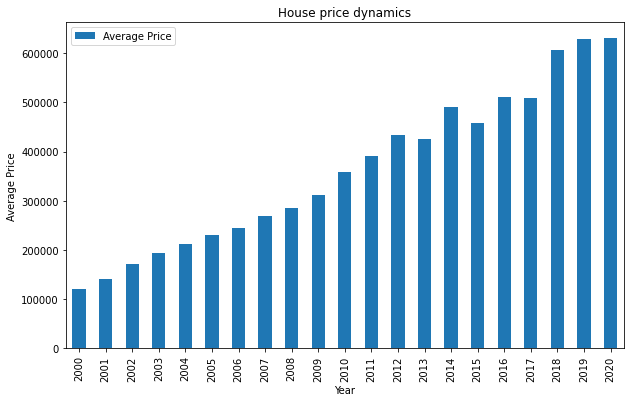

In [16]:
housePrice.plot(kind='bar', figsize=(10,6))

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('House price dynamics')

plt.show()

### Now let's look at rental prices behaviour since 2016 year using data from https://www.zumper.com


##### Convert csv data to dataframe

In [17]:
rent = pd.read_csv("/Users/stanislav/RentOttawa.csv")

rent.head()

,Unnamed: 0,1 Bedroom,Unnamed: 2,Unnamed: 3,2 Bedroom,Unnamed: 5,Unnamed: 6,3 Bedroom
0,Apr-2016,"$1,053",NaN,Apr-2016,"$1,342",NaN,Apr-2016,"$1,641"
1,May-2016,"$1,012",NaN,May-2016,"$1,299",NaN,May-2016,"$1,545"
2,Jun-2016,"$1,043",NaN,Jun-2016,"$1,286",NaN,Jun-2016,"$1,575"
3,Jul-2016,"$1,041",NaN,Jul-2016,"$1,291",NaN,Jul-2016,"$1,565"
4,Aug-2016,"$1,036",NaN,Aug-2016,"$1,299",NaN,Aug-2016,"$1,583"


##### Drop unnecessary columns

In [18]:
rent = rent.drop(columns=["Unnamed: 2", 'Unnamed: 3', 'Unnamed: 6', 'Unnamed: 5'], axis=1)

##### Remove $ sign from prices and convert them into integer type

In [19]:
rent['1 Bedroom'] = rent['1 Bedroom'].str.replace(',', '').str.replace('$','').astype('int')
rent['2 Bedroom'] = rent['2 Bedroom'].str.replace(',', '').str.replace('$','').astype('int')
rent['3 Bedroom'] = rent['3 Bedroom'].str.replace(',', '').str.replace('$','').astype('int')


/Users/stanislav/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/Users/stanislav/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/stanislav/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing 

##### Rename Unnamed column to Date and set it as Index

In [20]:
rent.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
rent.set_index('Date', inplace=True)
rent.head()

,1 Bedroom,2 Bedroom,3 Bedroom
Date,,,
Apr-2016,1053,1342,1641
May-2016,1012,1299,1545
Jun-2016,1043,1286,1575
Jul-2016,1041,1291,1565
Aug-2016,1036,1299,1583


##### Display our graph

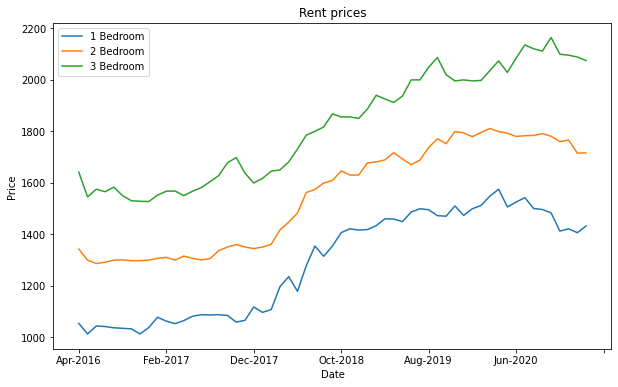

In [21]:
rent.index = rent.index.map(str)
rent.plot(kind='line', figsize=(10,6))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rent prices')

plt.show()

### Now let's explore entertainments around the centre 

In [22]:
entertainment = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT5)
entertainment

'https://api.foursquare.com/v2/venues/explore?client_id=IL3PP5XI2OX5JFQCLT25TCEYAVI1R5HSBZJHUO3WEW5CZND0&client_secret=VUI1YWUV4KPE15E1XKVRBLGOGXK3GPM3EPYYVEFOYRO12VHQ&ll=45.421106,-75.690308&v=20180604&radius=3000&limit=50'

In [23]:
results = requests.get(entertainment).json()

In [24]:
'There are {} vunues in the centre.'.format(len(results['response']['groups'][0]['items']))

'There are 50 vunues in the centre.'

##### Create dataframe and clean the data

In [25]:
df2 = json_normalize(results['response']['groups'][0]['items']) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in df2.columns if col.startswith('venue.location.')] + ['venue.id']
dataFilt = df2.loc[:, filtered_columns]

# filter the category for each row
dataFilt['venue.categories'] = dataFilt.apply(get_category_type, axis=1)

# clean columns
dataFilt.columns = [col.split('.')[-1] for col in dataFilt.columns]

dataFilt.head(10)

/Users/stanislav/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Confederation Park,Park,100 Elgin St,at Laurier Ave W,45.422069,-75.692518,"[{'label': 'display', 'lat': 45.42206901871169...",203,K1P 5K8,CA,Ottawa,ON,Canada,"[100 Elgin St (at Laurier Ave W), Ottawa ON K1...",NaN,4b0586e0f964a520c27222e3
1,National Arts Centre - Centre National des Arts,Concert Hall,53 Elgin St,NaN,45.422922,-75.692996,"[{'label': 'display', 'lat': 45.42292207192373...",291,K1P 5W1,CA,Ottawa,ON,Canada,"[53 Elgin St, Ottawa ON K1P 5W1, Canada]",Byward Market-Parliament Hill,4b29070bf964a5207f9724e3
2,Genji Japanese Restaurant,Japanese Restaurant,175 Lisgar St,between Metcalfe and Elgin,45.418981,-75.692465,"[{'label': 'display', 'lat': 45.418981, 'lng':...",290,K2P 0C3,CA,Ottawa,ON,Canada,"[175 Lisgar St (between Metcalfe and Elgin), O...",NaN,4b0586e1f964a520047322e3
3,Rideau Canal Skateway,Skating Rink,NaN,NaN,45.423612,-75.691689,"[{'label': 'display', 'lat': 45.42361226043321...",299,NaN,CA,Ottawa,ON,Canada,"[Ottawa ON, Canada]",NaN,51269f01e4b08a35872dadaf
4,Rideau Canal,Other Great Outdoors,Colonel By Dr,Queen Elizabeth Driveway,45.424781,-75.695129,"[{'label': 'display', 'lat': 45.4247808917841,...",556,NaN,CA,Ottawa,ON,Canada,"[Colonel By Dr (Queen Elizabeth Driveway), Ott...",NaN,4b0586dff964a520987222e3
5,Beckta Dining & Wine,Restaurant,150 Elgin,btwn Gloucester & Laurier,45.420567,-75.692717,"[{'label': 'display', 'lat': 45.42056667876410...",197,K2P 1L4,CA,Ottawa,ON,Canada,"[150 Elgin (btwn Gloucester & Laurier), Ottaw...",NaN,4b68c421f964a520bc8b2be3
6,La Bottega,Deli / Bodega,64 George St,btwn Byward Market Sq and William St,45.426894,-75.691906,"[{'label': 'display', 'lat': 45.426894, 'lng':...",656,K1N 5V9,CA,Ottawa,ON,Canada,[64 George St (btwn Byward Market Sq and Willi...,NaN,4b05c692f964a520fce222e3
7,National War Memorial,Memorial Site,4 Elgin St,Wellington St,45.423909,-75.695221,"[{'label': 'display', 'lat': 45.42390907691309...",494,K1N 9N6,CA,Ottawa,ON,Canada,"[4 Elgin St (Wellington St), Ottawa ON K1N 9N6...",Byward Market-Parliament Hill,4b0586dff964a5209e7222e3
8,The Scone Witch,Café,150 Elgin St,at Gloucester St,45.420009,-75.693456,"[{'label': 'display', 'lat': 45.42000922314047...",274,K1R 5B2,CA,Ottawa,ON,Canada,"[150 Elgin St (at Gloucester St), Ottawa ON K1...",NaN,4b2ea641f964a52048e424e3
9,Fairmont Château Laurier,Hotel,1 Rideau St.,at MacKenzie Ave,45.426241,-75.694909,"[{'label': 'display', 'lat': 45.42624084464259...",675,K1N 8S7,CA,Ottawa,ON,Canada,"[1 Rideau St. (at MacKenzie Ave), Ottawa ON K1...",NaN,4afd6c11f964a520b82722e3


##### Make a list of venues

In [26]:
dataFilt.name

0                                    Confederation Park
1       National Arts Centre - Centre National des Arts
2                             Genji Japanese Restaurant
3                                 Rideau Canal Skateway
4                                          Rideau Canal
5                                  Beckta Dining & Wine
6                                            La Bottega
7                                 National War Memorial
8                                       The Scone Witch
9                              Fairmont Château Laurier
10                                    The Westin Ottawa
11                               The Ministry of Coffee
12                                              freshii
13                                                 Town
14                  National Arts Centre - Southam Hall
15                                        Perfect Books
16                                          Cafe Deluxe
17                                         Pure 

##### Let's visualize venues on map

In [27]:
entertainment_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Ecco


# add Centre as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ottawa City Hall',
    fill=True,
    color='red',
    fill_color='yellow',
    fill_opacity=0.6
    ).add_to(entertainment_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataFilt.lat, dataFilt.lng, dataFilt.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(entertainment_map)

# display map
entertainment_map

### Discover restaurants around the centre

##### Search restaurants with Foursquare

In [28]:
search_query = 'Restaurant'
radius = 3000
print(search_query + 's found!')

Restaurants found!


In [29]:
food = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT4)
food

'https://api.foursquare.com/v2/venues/search?client_id=IL3PP5XI2OX5JFQCLT25TCEYAVI1R5HSBZJHUO3WEW5CZND0&client_secret=VUI1YWUV4KPE15E1XKVRBLGOGXK3GPM3EPYYVEFOYRO12VHQ&ll=45.421106,-75.690308&oauth_token=T2LPEPMJC5GDIOKOKZ00KN50LULI0DCIDLC3LMAPZQDKHJT0&v=20180604&query=Restaurant&radius=3000&limit=40'

##### Get data from link

In [30]:
getFood = requests.get(food).json()
getFood

{'meta': {'code': 200, 'requestId': '603aaf32d226252cc3d41986'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4d8b69137139b1f7300adfd4',
    'name': 'Holly Lane Restaurant',
    'location': {'address': '1-2410 Holly Ln.',
     'crossStreet': 'Walkley Rd.',
     'lat': 45.42016566993082,
     'lng': -75.69357821286718,
     'labeledLatLngs': [{'label': 'display',
       'lat': 45.42016566993082,
       'lng': -75.69357821286718}],
     'distance': 276,
     'postalCode': 'K1V 7P1',
     'cc': 'CA',
     'city': 'Ottawa',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1-2410 Holly Ln. (Walkley Rd.)',
      'Ottawa ON K1V 7P1',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d147941735',
      'name': 'Diner',
      'pluralName': 'Diners',
      'shortName': 'Diner',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_',
       'suffix': '.png'},
      'primary': 

##### Arrange data in dataframe

In [31]:
# assign relevant part of JSON to restaurants
restaurant = getFood['response']['venues']

# tranform restaurants into a dataframe
df3 = json_normalize(restaurant)
df3.head(10)

/Users/stanislav/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4d8b69137139b1f7300adfd4,Holly Lane Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1614458674,False,1-2410 Holly Ln.,Walkley Rd.,45.420166,-75.693578,"[{'label': 'display', 'lat': 45.42016566993082...",276,K1V 7P1,CA,Ottawa,ON,Canada,"[1-2410 Holly Ln. (Walkley Rd.), Ottawa ON K1V...",NaN,NaN
1,4c1e0804b4e62d7f0c9bdd93,73 North Restaurant,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1614458674,False,73 Sparks St,btw Metcalfe St and Elgin St,45.423101,-75.696786,"[{'label': 'display', 'lat': 45.42310058916462...",552,K1P 5A5,CA,Ottawa,ON,Canada,"[73 Sparks St (btw Metcalfe St and Elgin St), ...","Byward Market-Parliament Hill, Ottawa, ON",NaN
2,5acfc71a89b06a5c99a75950,Norca Restaurant & Bar,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1614458674,False,30 Daly Ave,NaN,45.425827,-75.688159,"[{'label': 'display', 'lat': 45.42582675471326...",551,K1N 6E2,CA,Ottawa,ON,Canada,"[30 Daly Ave, Ottawa ON K1N 6E2, Canada]",NaN,NaN
3,4b0586e1f964a520e67222e3,Courtyard Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1614458674,False,21 George Street,NaN,45.426864,-75.693833,"[{'label': 'display', 'lat': 45.42686404944558...",697,K1N 8W5,CA,Ottawa,ON,Canada,"[21 George Street, Ottawa ON K1N 8W5, Canada]",NaN,44270800
4,4b5c9d4ff964a520fe3929e3,Oriental Chu Shing Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1614458674,False,691 Somerset St. W.,Cambridge St N,45.411046,-75.706762,"[{'label': 'display', 'lat': 45.41104644056568...",1705,K1R 6P5,CA,Ottawa,ON,Canada,"[691 Somerset St. W. (Cambridge St N), Ottawa ...",NaN,NaN
5,4ea7382ef9f4e0745d968635,Restaurant Jazzy (University Centre | Centre u...,"[{'id': '4bf58dd8d48988d1a1941735', 'name': 'C...",v-1614458674,False,85 University | Université,NaN,45.422537,-75.683548,"[{'label': 'display', 'lat': 45.4225369464902,...",551,K1N 6N5,CA,Ottawa,ON,Canada,"[85 University | Université, Ottawa ON K1N 6N5...",NaN,NaN
6,5886962c4bafb7091152ef81,Restaurant Kebab Prince,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1614458674,False,NaN,NaN,45.427654,-75.690132,"[{'label': 'display', 'lat': 45.427654, 'lng':...",729,NaN,CA,Ottawa,ON,Canada,"[Ottawa ON, Canada]",NaN,NaN
7,4b0586e1f964a520047322e3,Genji Japanese Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1614458674,False,175 Lisgar St,between Metcalfe and Elgin,45.418981,-75.692465,"[{'label': 'display', 'lat': 45.418981, 'lng':...",290,K2P 0C3,CA,Ottawa,ON,Canada,"[175 Lisgar St (between Metcalfe and Elgin), O...",NaN,NaN
8,4b0586e1f964a520db7222e3,Johnny Farina Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1614458674,False,216 Elgin St,at Lisgar St,45.418950,-75.691558,"[{'label': 'display', 'lat': 45.41894975977421...",259,K2P 1L7,CA,Ottawa,ON,Canada,"[216 Elgin St (at Lisgar St), Ottawa ON K2P 1L...",golden,NaN
9,4b8717e7f964a52031b031e3,Sante Restaurant,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1614458674,False,45 Rideau St,Sussex Dr,45.425474,-75.693228,"[{'label': 'display', 'lat': 45.42547441129474...",537,K1N 5W8,CA,Ottawa,ON,Canada,"[45 Rideau St (Sussex Dr), Ottawa ON K1N 5W8, ...","Byward Market-Parliament Hill, Ottawa, ON",NaN


##### Clean data

In [32]:
filtered_columns1 = ['name', 'categories'] + [col for col in df3.columns if col.startswith('location.')] + ['id']
newData = df3.loc[:, filtered_columns1]

# function that extracts the category of the restaurants
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['restaurant.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
newData['categories'] = newData.apply(get_category_type, axis=1)

# clean column names by keeping only last term
newData.columns = [column.split('.')[-1] for column in newData.columns]

newData

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Holly Lane Restaurant,Diner,1-2410 Holly Ln.,Walkley Rd.,45.420166,-75.693578,"[{'label': 'display', 'lat': 45.42016566993082...",276,K1V 7P1,CA,Ottawa,ON,Canada,"[1-2410 Holly Ln. (Walkley Rd.), Ottawa ON K1V...",NaN,4d8b69137139b1f7300adfd4
1,73 North Restaurant,Middle Eastern Restaurant,73 Sparks St,btw Metcalfe St and Elgin St,45.423101,-75.696786,"[{'label': 'display', 'lat': 45.42310058916462...",552,K1P 5A5,CA,Ottawa,ON,Canada,"[73 Sparks St (btw Metcalfe St and Elgin St), ...","Byward Market-Parliament Hill, Ottawa, ON",4c1e0804b4e62d7f0c9bdd93
2,Norca Restaurant & Bar,Restaurant,30 Daly Ave,NaN,45.425827,-75.688159,"[{'label': 'display', 'lat': 45.42582675471326...",551,K1N 6E2,CA,Ottawa,ON,Canada,"[30 Daly Ave, Ottawa ON K1N 6E2, Canada]",NaN,5acfc71a89b06a5c99a75950
3,Courtyard Restaurant,Restaurant,21 George Street,NaN,45.426864,-75.693833,"[{'label': 'display', 'lat': 45.42686404944558...",697,K1N 8W5,CA,Ottawa,ON,Canada,"[21 George Street, Ottawa ON K1N 8W5, Canada]",NaN,4b0586e1f964a520e67222e3
4,Oriental Chu Shing Restaurant,Chinese Restaurant,691 Somerset St. W.,Cambridge St N,45.411046,-75.706762,"[{'label': 'display', 'lat': 45.41104644056568...",1705,K1R 6P5,CA,Ottawa,ON,Canada,"[691 Somerset St. W. (Cambridge St N), Ottawa ...",NaN,4b5c9d4ff964a520fe3929e3
5,Restaurant Jazzy (University Centre | Centre u...,College Cafeteria,85 University | Université,NaN,45.422537,-75.683548,"[{'label': 'display', 'lat': 45.4225369464902,...",551,K1N 6N5,CA,Ottawa,ON,Canada,"[85 University | Université, Ottawa ON K1N 6N5...",NaN,4ea7382ef9f4e0745d968635
6,Restaurant Kebab Prince,Middle Eastern Restaurant,NaN,NaN,45.427654,-75.690132,"[{'label': 'display', 'lat': 45.427654, 'lng':...",729,NaN,CA,Ottawa,ON,Canada,"[Ottawa ON, Canada]",NaN,5886962c4bafb7091152ef81
7,Genji Japanese Restaurant,Japanese Restaurant,175 Lisgar St,between Metcalfe and Elgin,45.418981,-75.692465,"[{'label': 'display', 'lat': 45.418981, 'lng':...",290,K2P 0C3,CA,Ottawa,ON,Canada,"[175 Lisgar St (between Metcalfe and Elgin), O...",NaN,4b0586e1f964a520047322e3
8,Johnny Farina Restaurant,Italian Restaurant,216 Elgin St,at Lisgar St,45.418950,-75.691558,"[{'label': 'display', 'lat': 45.41894975977421...",259,K2P 1L7,CA,Ottawa,ON,Canada,"[216 Elgin St (at Lisgar St), Ottawa ON K2P 1L...",golden,4b0586e1f964a520db7222e3
9,Sante Restaurant,Asian Restaurant,45 Rideau St,Sussex Dr,45.425474,-75.693228,"[{'label': 'display', 'lat': 45.42547441129474...",537,K1N 5W8,CA,Ottawa,ON,Canada,"[45 Rideau St (Sussex Dr), Ottawa ON K1N 5W8, ...","Byward Market-Parliament Hill, Ottawa, ON",4b8717e7f964a52031b031e3


##### Remove QC state from our list (Province of Quebec, Canada)

In [34]:
newData = newData.drop(newData[newData.state == 'QC'].index)
newData.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Holly Lane Restaurant,Diner,1-2410 Holly Ln.,Walkley Rd.,45.420166,-75.693578,"[{'label': 'display', 'lat': 45.42016566993082...",276,K1V 7P1,CA,Ottawa,ON,Canada,"[1-2410 Holly Ln. (Walkley Rd.), Ottawa ON K1V...",NaN,4d8b69137139b1f7300adfd4
1,73 North Restaurant,Middle Eastern Restaurant,73 Sparks St,btw Metcalfe St and Elgin St,45.423101,-75.696786,"[{'label': 'display', 'lat': 45.42310058916462...",552,K1P 5A5,CA,Ottawa,ON,Canada,"[73 Sparks St (btw Metcalfe St and Elgin St), ...","Byward Market-Parliament Hill, Ottawa, ON",4c1e0804b4e62d7f0c9bdd93
2,Norca Restaurant & Bar,Restaurant,30 Daly Ave,NaN,45.425827,-75.688159,"[{'label': 'display', 'lat': 45.42582675471326...",551,K1N 6E2,CA,Ottawa,ON,Canada,"[30 Daly Ave, Ottawa ON K1N 6E2, Canada]",NaN,5acfc71a89b06a5c99a75950
3,Courtyard Restaurant,Restaurant,21 George Street,NaN,45.426864,-75.693833,"[{'label': 'display', 'lat': 45.42686404944558...",697,K1N 8W5,CA,Ottawa,ON,Canada,"[21 George Street, Ottawa ON K1N 8W5, Canada]",NaN,4b0586e1f964a520e67222e3
4,Oriental Chu Shing Restaurant,Chinese Restaurant,691 Somerset St. W.,Cambridge St N,45.411046,-75.706762,"[{'label': 'display', 'lat': 45.41104644056568...",1705,K1R 6P5,CA,Ottawa,ON,Canada,"[691 Somerset St. W. (Cambridge St N), Ottawa ...",NaN,4b5c9d4ff964a520fe3929e3


##### Visualize restaurants on map

In [35]:
restaurant_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map 


for lat, lng, label in zip(newData.lat, newData.lng, newData.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(restaurant_map)

# display map
restaurant_map



### Let's group restaurants by distance from centre using Kmeans clusters

##### Create clusters to group restaurants by distance

In [36]:
# Set number of clusters
clusters = 3
# remove unnecessary columns that are not numeric
grouped_clustering = newData.drop(['name', 'categories', 'address', 'crossStreet','labeledLatLngs','postalCode','cc','city','state','country','formattedAddress','neighborhood','id'],1)
# run k-means clustering
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(grouped_clustering)
# check cluster labels
kmeans.labels_[0:10]

array([1, 1, 1, 2, 0, 1, 2, 1, 1, 1], dtype=int32)

##### Add clusters to dataframe

In [37]:
newData.insert(0, 'Cluster Labels', kmeans.labels_)
newData

,Cluster Labels,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,1,Holly Lane Restaurant,Diner,1-2410 Holly Ln.,Walkley Rd.,45.420166,-75.693578,"[{'label': 'display', 'lat': 45.42016566993082...",276,K1V 7P1,CA,Ottawa,ON,Canada,"[1-2410 Holly Ln. (Walkley Rd.), Ottawa ON K1V...",NaN,4d8b69137139b1f7300adfd4
1,1,73 North Restaurant,Middle Eastern Restaurant,73 Sparks St,btw Metcalfe St and Elgin St,45.423101,-75.696786,"[{'label': 'display', 'lat': 45.42310058916462...",552,K1P 5A5,CA,Ottawa,ON,Canada,"[73 Sparks St (btw Metcalfe St and Elgin St), ...","Byward Market-Parliament Hill, Ottawa, ON",4c1e0804b4e62d7f0c9bdd93
2,1,Norca Restaurant & Bar,Restaurant,30 Daly Ave,NaN,45.425827,-75.688159,"[{'label': 'display', 'lat': 45.42582675471326...",551,K1N 6E2,CA,Ottawa,ON,Canada,"[30 Daly Ave, Ottawa ON K1N 6E2, Canada]",NaN,5acfc71a89b06a5c99a75950
3,2,Courtyard Restaurant,Restaurant,21 George Street,NaN,45.426864,-75.693833,"[{'label': 'display', 'lat': 45.42686404944558...",697,K1N 8W5,CA,Ottawa,ON,Canada,"[21 George Street, Ottawa ON K1N 8W5, Canada]",NaN,4b0586e1f964a520e67222e3
4,0,Oriental Chu Shing Restaurant,Chinese Restaurant,691 Somerset St. W.,Cambridge St N,45.411046,-75.706762,"[{'label': 'display', 'lat': 45.41104644056568...",1705,K1R 6P5,CA,Ottawa,ON,Canada,"[691 Somerset St. W. (Cambridge St N), Ottawa ...",NaN,4b5c9d4ff964a520fe3929e3
5,1,Restaurant Jazzy (University Centre | Centre u...,College Cafeteria,85 University | Université,NaN,45.422537,-75.683548,"[{'label': 'display', 'lat': 45.4225369464902,...",551,K1N 6N5,CA,Ottawa,ON,Canada,"[85 University | Université, Ottawa ON K1N 6N5...",NaN,4ea7382ef9f4e0745d968635
6,2,Restaurant Kebab Prince,Middle Eastern Restaurant,NaN,NaN,45.427654,-75.690132,"[{'label': 'display', 'lat': 45.427654, 'lng':...",729,NaN,CA,Ottawa,ON,Canada,"[Ottawa ON, Canada]",NaN,5886962c4bafb7091152ef81
7,1,Genji Japanese Restaurant,Japanese Restaurant,175 Lisgar St,between Metcalfe and Elgin,45.418981,-75.692465,"[{'label': 'display', 'lat': 45.418981, 'lng':...",290,K2P 0C3,CA,Ottawa,ON,Canada,"[175 Lisgar St (between Metcalfe and Elgin), O...",NaN,4b0586e1f964a520047322e3
8,1,Johnny Farina Restaurant,Italian Restaurant,216 Elgin St,at Lisgar St,45.418950,-75.691558,"[{'label': 'display', 'lat': 45.41894975977421...",259,K2P 1L7,CA,Ottawa,ON,Canada,"[216 Elgin St (at Lisgar St), Ottawa ON K2P 1L...",golden,4b0586e1f964a520db7222e3
9,1,Sante Restaurant,Asian Restaurant,45 Rideau St,Sussex Dr,45.425474,-75.693228,"[{'label': 'display', 'lat': 45.42547441129474...",537,K1N 5W8,CA,Ottawa,ON,Canada,"[45 Rideau St (Sussex Dr), Ottawa ON K1N 5W8, ...","Byward Market-Parliament Hill, Ottawa, ON",4b8717e7f964a52031b031e3


##### Let's visualize our restaurants clustered by distance

In [38]:
MapClusters = folium.Map(location = [45.421106, -75.690308], zoom_start=13)

# make scheme for clusters
x = np.arange(clusters)
y = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0,1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(newData['lat'], newData['lng'], newData['name'], newData['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-3],
        fill = True,
        fill_color = rainbow[cluster-0],
        fill_opacity = 0.9).add_to(MapClusters)
    
MapClusters

##### Please also see my Report and Presentation for details : <br> Presentation: https://github.com/Berlzebuba/Capstone-Project/blob/main/Capstone%20Project%20Presentation(week%202).pptx  <br> Report: https://github.com/Berlzebuba/Capstone-Project/blob/main/Capstone%20Project%20Report%20(week%202).docx

### Thank you!